# 9: Grover algorithm

In [1]:
from renom_q import *

Grover's algorithm is a quantum search algorithm that finds one from $N$ unmarshalled data.

## 9-1: Search method of Grover algorithm

### (1) Superposition state with equal probability amplitude

In case of $N=4$,
$$\left| \phi \right\rangle=\frac{1}{2}\left( \left| 0 \right\rangle + \left| 1 \right\rangle + \left| 2 \right\rangle + \left| 3\right\rangle \right) $$

{'00': 245, '01': 282, '10': 236, '11': 261}


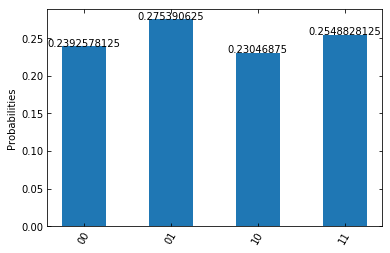

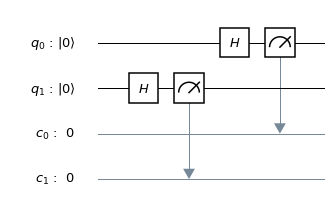

In [2]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

### (2) Marking by phase inversion of search solution

If the search solution is $\left| 3 \right\rangle = \left| 11 \right\rangle$,
$$\left| \phi \right\rangle=\frac{1}{2}\left( \left| 0 \right\rangle + \left| 1 \right\rangle + \left| 2 \right\rangle - \left| 3\right\rangle \right) $$

{'00': 247, '01': 291, '10': 254, '11': 232}


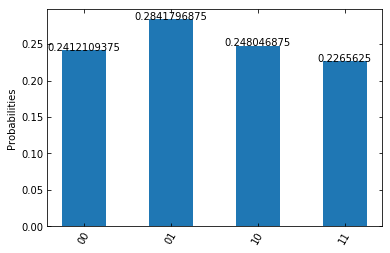

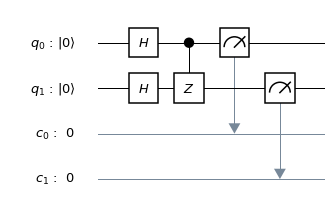

In [3]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
qc.cz(q[0], q[1])
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

### (3) Inversion around the mean value of the probability amplitude (diffusion conversion)

In [4]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
qc.cz(q[0], q[1])

print(statevector(qc))

[ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


$$\left\langle av \right\rangle = \frac{1}{4}\left( \frac{1}{2} + \frac{1}{2} + \frac{1}{2} - \frac{1}{2} \right) = \frac{1}{4}$$

$$\left| \phi \right\rangle = \sum^3_{n=0}\left[ \left\langle av \right\rangle + \left( \left\langle av \right\rangle - \alpha_n \right) \right] \left| n \right\rangle = \left| 3\right\rangle $$

In [5]:
def deffusion4(qci, bn, a, b):
    for i in range(bn):
        qci.h(q[i])
        qci.x(q[i])
    qci.cz(q[a], q[b])
    for i in range(bn):
        qci.x(q[i])
        qci.h(q[i])

{'11': 1024}


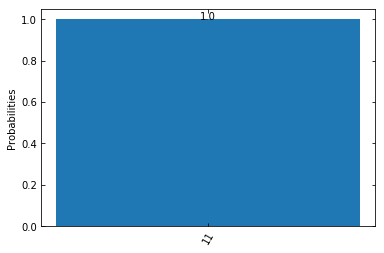

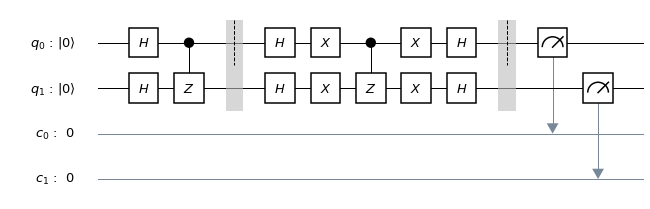

In [6]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
qc.cz(q[0], q[1])
qc.barrier()
deffusion4(qc, bn, 0, 1)
qc.barrier()
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

## 9-2: In case of another search solution

In [7]:
def marking0(qci, a, b):
    for i in range(2):
        qci.s(q[i])
    qci.cz(q[a], q[b])
    for i in range(2):
        qci.s(q[i])
    
def marking1(qci, a, b):
    qci.s(q[b])
    qci.cz(q[a], q[b])
    qci.s(q[b])
    
def marking2(qci, a, b):
    qci.s(q[a])
    qci.cz(q[a], q[b])
    qci.s(q[a])
    
def marking3(qci, a, b):
    qci.cz(q[a], q[b])

### (1) Search solution $\left | 0 \right\rangle$

{'00': 1024}


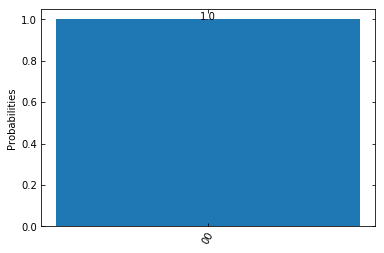

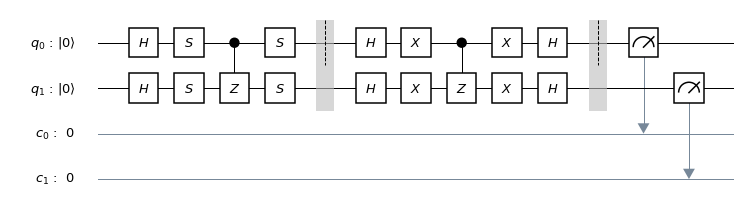

In [8]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
marking0(qc, 0, 1)
qc.barrier()
deffusion4(qc, bn, 0, 1)
qc.barrier()
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

### (2) Search solution $\left | 1 \right\rangle$

{'01': 1024}


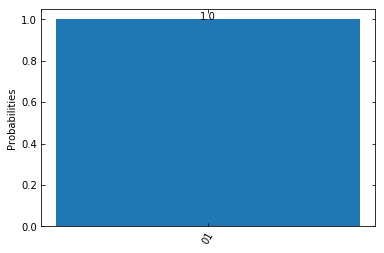

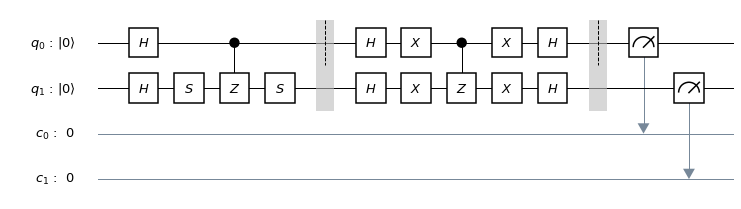

In [9]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
marking1(qc, 0, 1)
qc.barrier()
deffusion4(qc, bn, 0, 1)
qc.barrier()
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

### (3) Search solution $\left | 2 \right\rangle$

{'10': 1024}


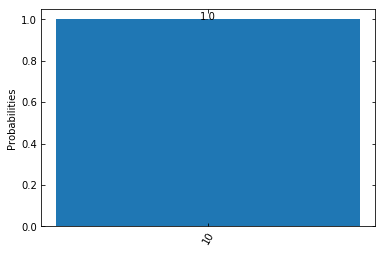

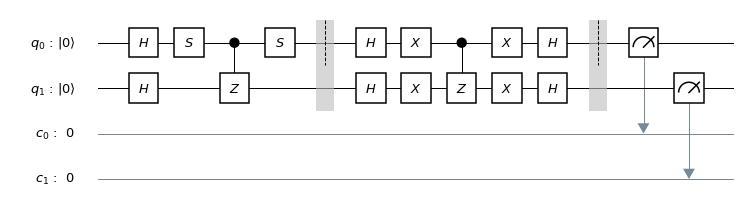

In [10]:
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(bn)
qc = QuantumCircuit(q, c)

for i in range(bn):
    qc.h(q[i])
marking2(qc, 0, 1)
qc.barrier()
deffusion4(qc, bn, 0, 1)
qc.barrier()
qc.measure()

r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)